In [798]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

In [799]:
df = pd.read_csv('/Users/adityagulalia/Desktop/Customer-Churn/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [800]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [801]:
df.drop(columns=['customerID',], inplace=True)

In [802]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

In [803]:
missing = df.isnull().sum().sort_values(ascending=False).reset_index()
missing

,index,0
0,gender,0
1,SeniorCitizen,0
2,TotalCharges,0
3,MonthlyCharges,0
4,PaymentMethod,0
5,PaperlessBilling,0
6,Contract,0
7,StreamingMovies,0
8,StreamingTV,0
9,TechSupport,0


increasiing the size of the dataset 

In [804]:
df.replace(" ",pd.NA, inplace = True)
df.dropna(inplace=True)

In [805]:
def bootstrap_with_noise(df, target_rows=40000, noise_level=0.02):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

    samples = df.sample(n=target_rows, replace=True).reset_index(drop=True)

    for col in numeric_cols:
        std = df[col].std()
        samples[col] += np.random.normal(0, noise_level * std, size=len(samples))

    return samples

expanded_df = bootstrap_with_noise(df, 40000)
expanded_df.to_csv("telco_churn_40k.csv", index=False)



In [806]:
print("Number of rows:", expanded_df.shape[0])
print("Number of columns:", expanded_df.shape[1])
expanded_df.shape

Number of rows: 40000
Number of columns: 20


(40000, 20)

In [807]:
expanded_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            40000 non-null  str    
 1   SeniorCitizen     40000 non-null  float64
 2   Partner           40000 non-null  str    
 3   Dependents        40000 non-null  str    
 4   tenure            40000 non-null  float64
 5   PhoneService      40000 non-null  str    
 6   MultipleLines     40000 non-null  str    
 7   InternetService   40000 non-null  str    
 8   OnlineSecurity    40000 non-null  str    
 9   OnlineBackup      40000 non-null  str    
 10  DeviceProtection  40000 non-null  str    
 11  TechSupport       40000 non-null  str    
 12  StreamingTV       40000 non-null  str    
 13  StreamingMovies   40000 non-null  str    
 14  Contract          40000 non-null  str    
 15  PaperlessBilling  40000 non-null  str    
 16  PaymentMethod     40000 non-null  str    
 17  Mont

“The original dataset was sufficient to build a model, but increasing the dataset size helped reduce variance, improve stability, and better demonstrate model performance on a larger scale.”

In [808]:
numerical_col1 = expanded_df.select_dtypes(include=['int64', 'float64']).columns
categorical_col1 = expanded_df.select_dtypes(include=['object']).columns
categorical_col1 = categorical_col1.drop(['TotalCharges'], errors='ignore')

len(numerical_col1), len(categorical_col1)

/var/folders/0y/r26483010m901fwq29c500rc0000gn/T/ipykernel_25127/152237330.py:2: Pandas4Warning:

For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.



(3, 16)

In [809]:
expanded_df["Churn"] = expanded_df["Churn"].map({"Yes": 1, "No": 0})

In [810]:
expanded_df["Churn"]

0        1
1        0
2        0
3        0
4        0
        ..
39995    0
39996    0
39997    0
39998    1
39999    0
Name: Churn, Length: 40000, dtype: int64

In [811]:
corr = expanded_df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']].corr()
corr

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
tenure,1.000000,0.247092,0.827865,0.011372,-0.354989
MonthlyCharges,0.247092,1.000000,0.648838,0.217107,0.191130
TotalCharges,0.827865,0.648838,1.000000,0.096679,-0.201492
SeniorCitizen,0.011372,0.217107,0.096679,1.000000,0.152925
Churn,-0.354989,0.191130,-0.201492,0.152925,1.000000


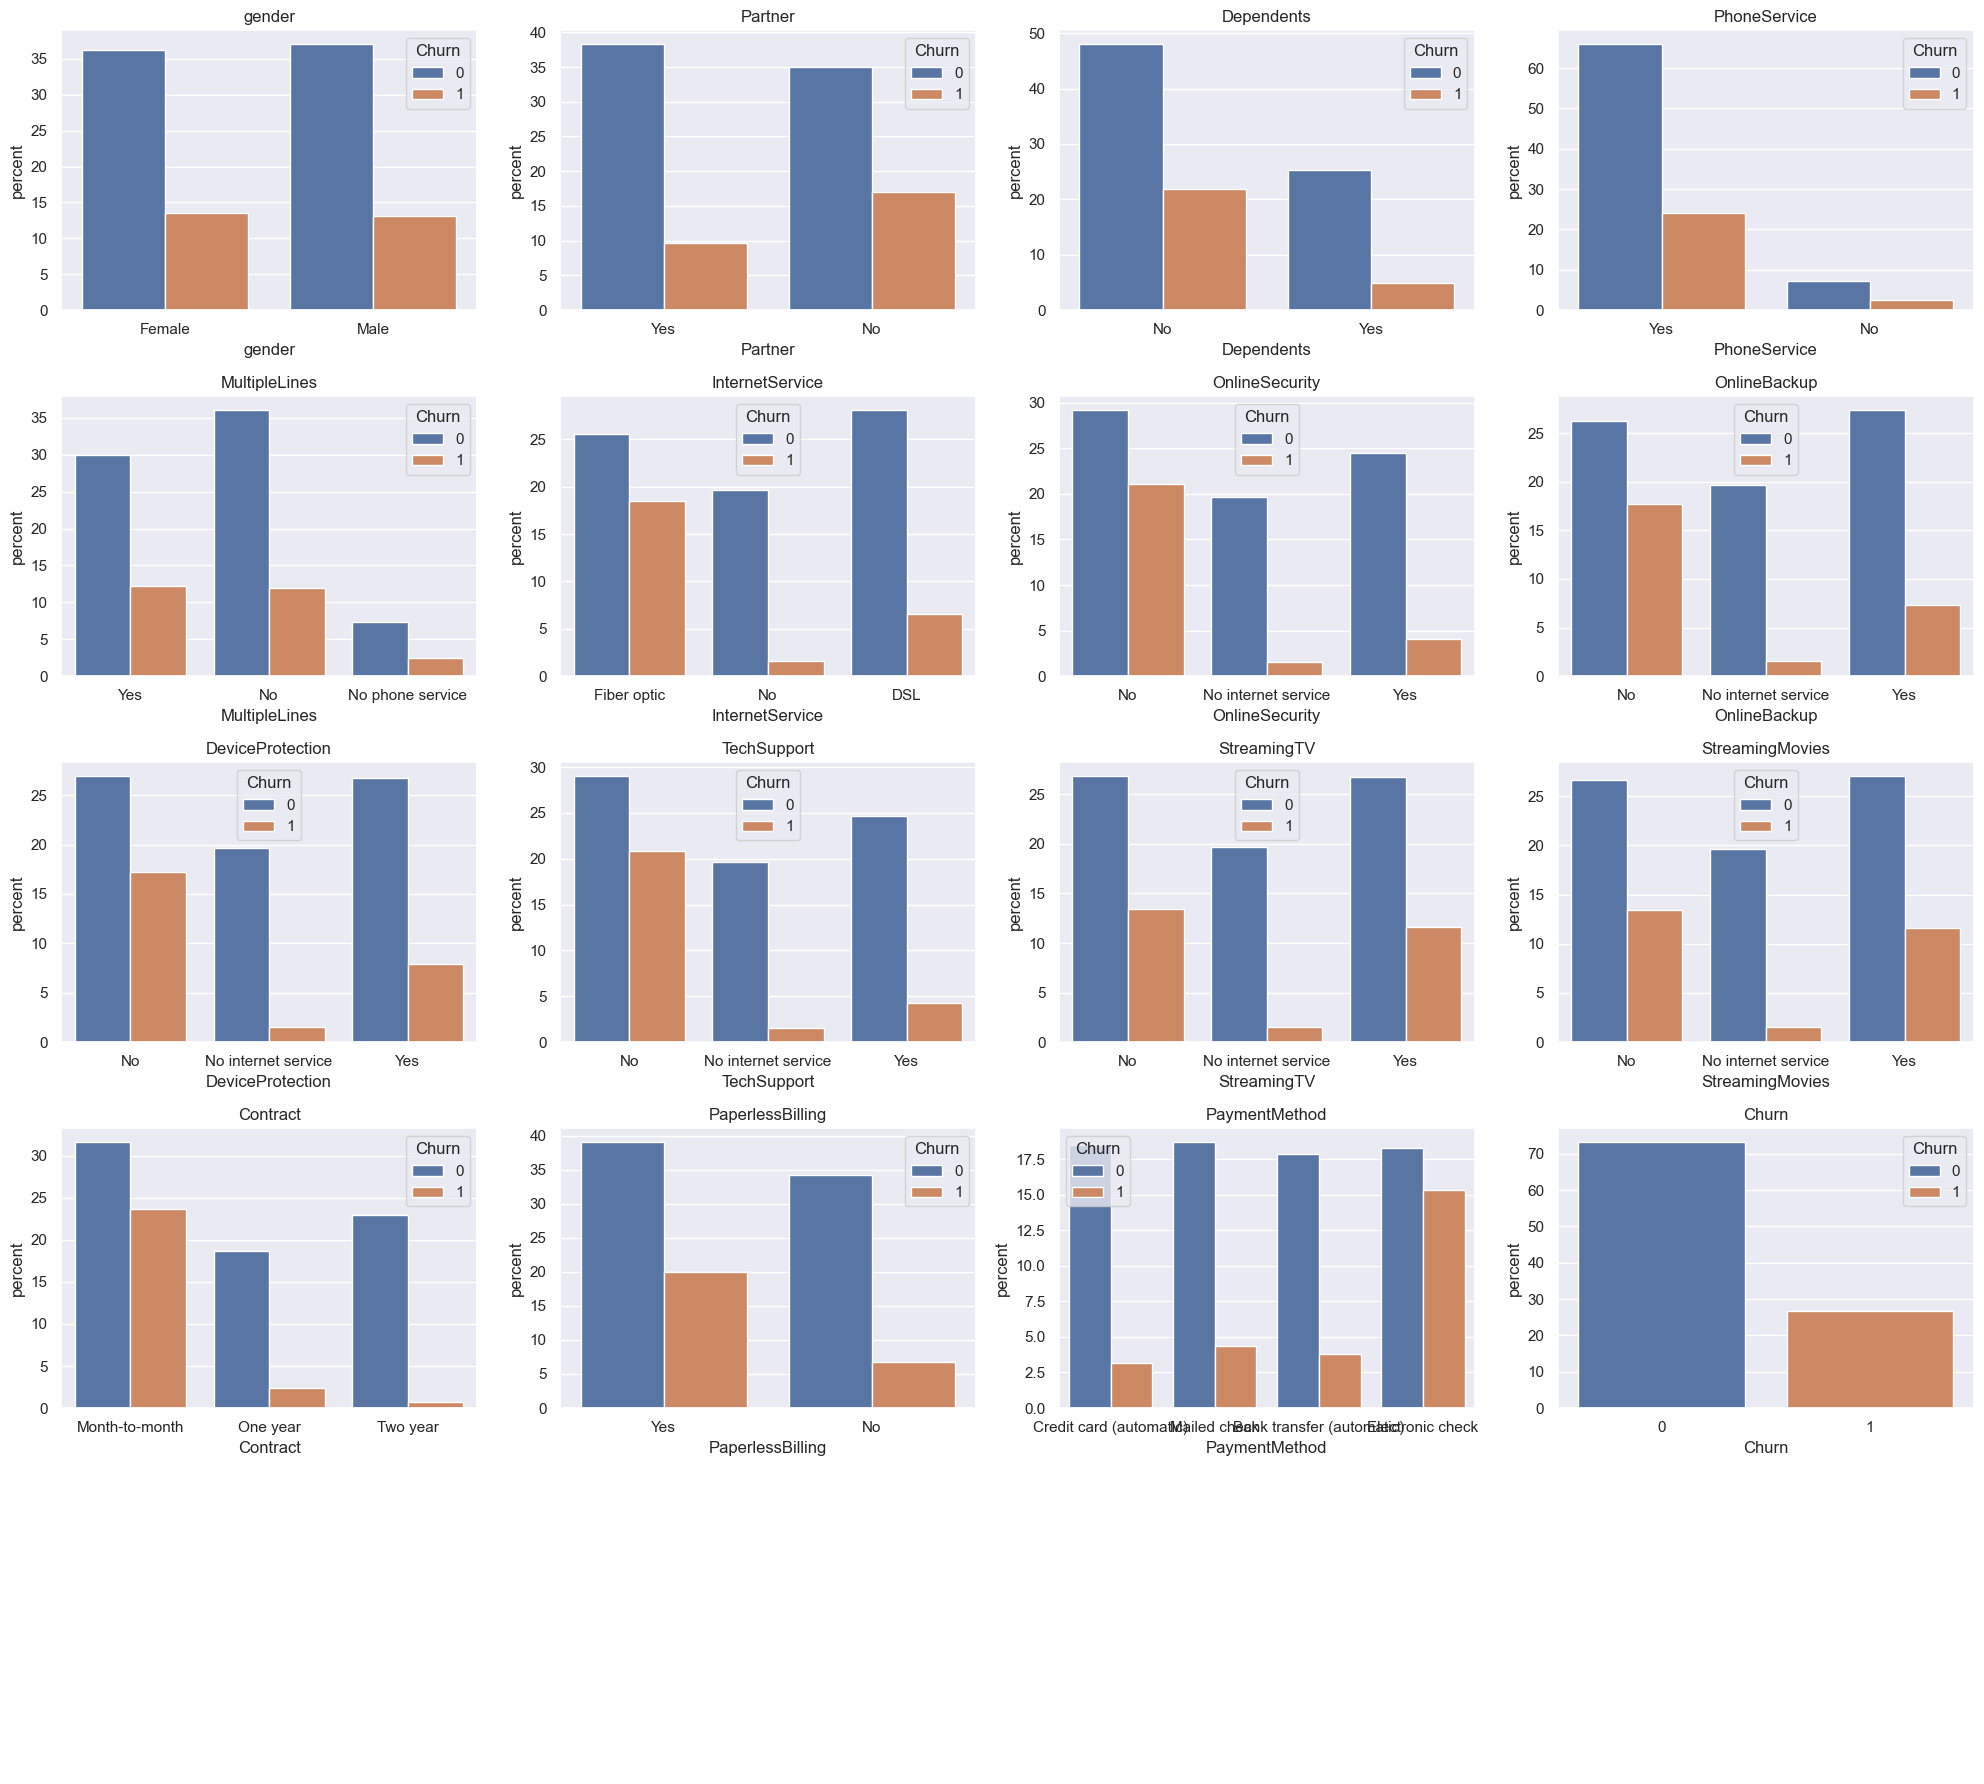

In [812]:
sns.set(style = "darkgrid")
fig, ax = plt.subplots(5 ,4, figsize = (20, 18))
ax = ax.flatten()
for i, col in enumerate(categorical_col1):
    sns.countplot(x=col, hue='Churn', data=expanded_df, ax=ax[i],stat='percent')
    ax[i].set_title(col)
for j in range(len(categorical_col1), 20):
    ax[j].axis('off')
plt.tight_layout()
plt.show()    

In [813]:
df_eda = df.copy()


In [814]:
input = df_eda.drop('Churn',axis=1)
target = df_eda['Churn']

In [815]:
input.dtypes

gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
dtype: object

In [816]:
col_encode = input.select_dtypes(include=['object']).columns

/var/folders/0y/r26483010m901fwq29c500rc0000gn/T/ipykernel_25127/673737169.py:1: Pandas4Warning:

For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.



In [817]:
input = pd.get_dummies(input, columns=col_encode, drop_first=True)

In [818]:
numerical_col1

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='str')

In [819]:
scalar = StandardScaler()
input[numerical_col1] = scalar.fit_transform(input[numerical_col1])

In [820]:
X_train, X_test, y_train, y_test = train_test_split(input, target,test_size=0.2,random_state=42,stratify=target)


In [821]:

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [822]:
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1033
         Yes       0.65      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC: 0.8351602983884745


In [823]:

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [824]:

y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8205605396255131


In [826]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=input.columns
).sort_values(ascending=False)

feature_importance.head(10)

tenure                            0.114732
MonthlyCharges                    0.091284
PaymentMethod_Electronic check    0.028729
InternetService_Fiber optic       0.026760
Contract_Two year                 0.026101
OnlineSecurity_Yes                0.024007
TechSupport_Yes                   0.023436
Contract_One year                 0.022362
PaperlessBilling_Yes              0.019590
gender_Male                       0.018907
dtype: float64